# Exam Data Science 1 (2021 - 2022)

## General Information

Data source:
https://archive.ics.uci.edu/ml/datasets/student%2Bperformance

#### ***Personal Information***

First name: Njinju

Last name: Zilefac Fogap

Student number: r069037

#### ***Imports***

In [1]:
# put all your library imports here
import numpy as np
import pandas as pd

from random import randrange
import math
from math import ceil
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,accuracy_score,roc_auc_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import cluster 

from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering


#### ***Data Assignment***

You need only use a selection of the original dataset. The variables have been grouped into several groups. You will use the *Basic* Group along with 2 other groups to predict G3.
Each group has been given a number.

The following script will assign you the numbers of the groups you will need to use in the assignment. Replace my personel number with your student number, and run the script **once**. After you have run the script, paste a screenshot below. This is of utmost importance, as the data assignment script uses random numbers.

Variable to predict:
+ G3

Basic:
+ school
+ sex
+ age
+ address
+ famsize

[1] Parents:
+ Medu
+ Fedu
+ Mjob
+ Fjob

[2] Surrounding: 
+ reason
+ nursery
+ internet

[3] Extra:
+ freetime
+ guardian
+ traveltime
+ studytime
+ failures

[4] Support:
+ schoolsup
+ famsup
+ paid

[5] Extra curricular:
+ activities
+ higher
+ romantic
+ famrel

[6] Relaxation:
+ goout
+ Dalc
+ Walc

[7] Health:
+ health
+ absences


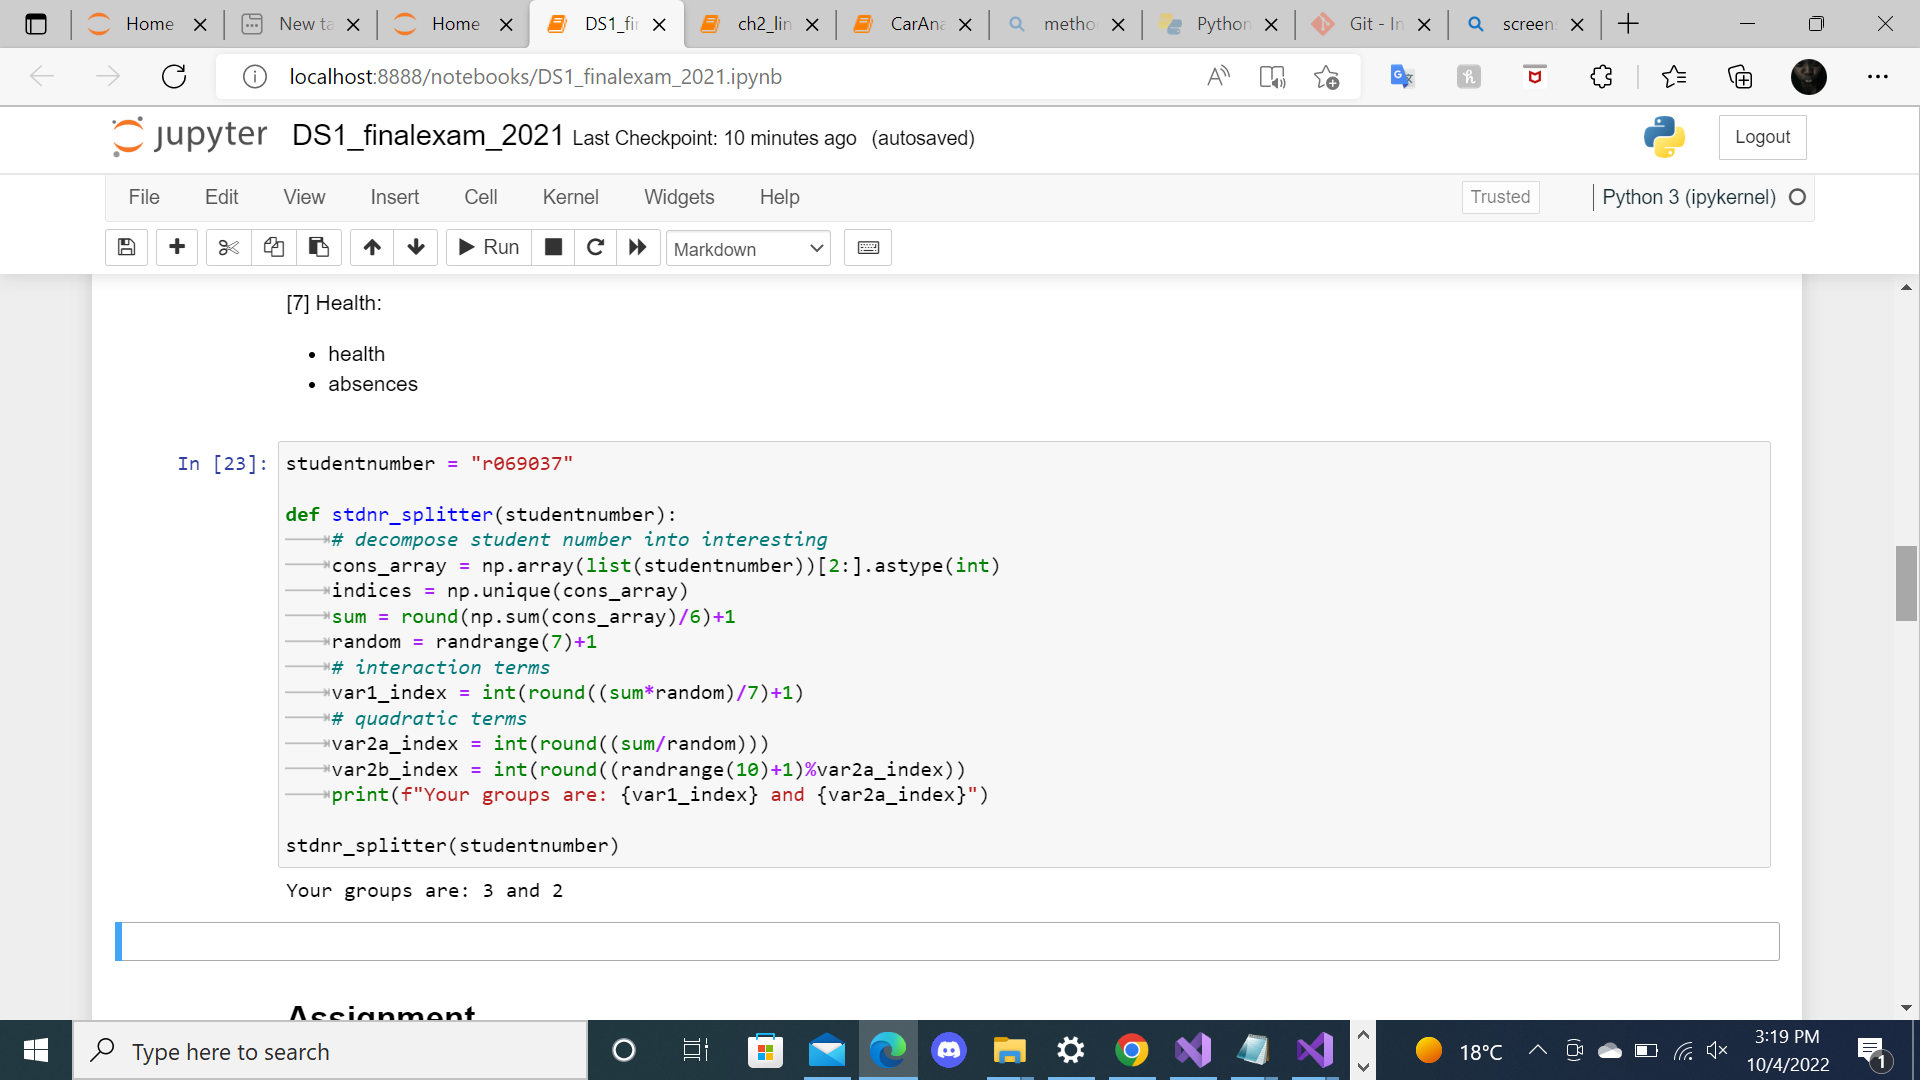

In [2]:
studentnumber = "r069037"

def stdnr_splitter(studentnumber):
	# decompose student number into interesting 
	cons_array = np.array(list(studentnumber))[2:].astype(int)
	indices = np.unique(cons_array)
	sum = round(np.sum(cons_array)/6)+1
	random = randrange(7)+1
	# interaction terms
	var1_index = int(round((sum*random)/7)+1)
	# quadratic terms
	var2a_index = int(round((sum/random)))
	var2b_index = int(round((randrange(10)+1)%var2a_index))
	print(f"Your groups are: {var1_index} and {var2a_index}")

stdnr_splitter(studentnumber)

Your groups are: 5 and 1


## Assignment

### Question 1: General

Welcome to the Data Science Fundamentals exam!

# Data Cleaning and Exploration

In [3]:
# Reading the file into the dataframe student_df
Student_df = pd.read_csv("student-mat.csv" , sep = ";")

In [5]:
Student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
RealStudent_df = Student_df.loc[:,["school",
                         "sex" , 
                         "age",
                         "address",
                         "famsize",
                         "freetime",
                         "guardian",
                         "traveltime",
                         "studytime",
                         "failures",
                         "reason",
                         "nursery",
                         "internet",
                         "G3"]]
RealStudent_df

,school,sex,age,address,famsize,freetime,guardian,traveltime,studytime,failures,reason,nursery,internet,G3
0,GP,F,18,U,GT3,3,mother,2,2,0,course,yes,no,6
1,GP,F,17,U,GT3,3,father,1,2,0,course,no,yes,6
2,GP,F,15,U,LE3,3,mother,1,2,3,other,yes,yes,10
3,GP,F,15,U,GT3,2,mother,1,3,0,home,yes,yes,15
4,GP,F,16,U,GT3,3,father,1,2,0,home,yes,no,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,5,other,1,2,2,course,yes,no,9
391,MS,M,17,U,LE3,4,mother,2,1,0,course,no,yes,16
392,MS,M,21,R,GT3,5,other,1,1,3,course,no,no,7
393,MS,M,18,R,LE3,4,mother,3,1,0,course,no,yes,10


### In other to analyze our dataset, it is important to explore and clean our data set. The are ways to do this, which includes  the following :
- Check missing values  
- Check duplicates 
- Check outliers 

In [8]:
# Check missing values
RealStudent_df.isnull().sum().sort_values(ascending=False)

school        0
sex           0
age           0
address       0
famsize       0
freetime      0
guardian      0
traveltime    0
studytime     0
failures      0
reason        0
nursery       0
internet      0
G3            0
dtype: int64

In [9]:
# Check duplicates
RealStudent_df.duplicated().sum()

1

In [10]:
d = RealStudent_df.loc[RealStudent_df.duplicated(), :]
d

,school,sex,age,address,famsize,freetime,guardian,traveltime,studytime,failures,reason,nursery,internet,G3
113,GP,M,15,U,LE3,5,mother,1,1,0,course,yes,yes,19


In [11]:
RealStudent_df.drop_duplicates(inplace=True)

In [12]:
RealStudent_df.duplicated().sum()

0

In [13]:
RealStudent_df['school']=RealStudent_df['school'].astype('category').cat.codes
RealStudent_df['sex']=RealStudent_df['sex'].astype('category').cat.codes
RealStudent_df['address']=RealStudent_df['address'].astype('category').cat.codes
RealStudent_df['famsize']=RealStudent_df['famsize'].astype('category').cat.codes
RealStudent_df['guardian']=RealStudent_df['guardian'].astype('category').cat.codes
RealStudent_df['reason']=RealStudent_df['reason'].astype('category').cat.codes
RealStudent_df['nursery']=RealStudent_df['nursery'].astype('category').cat.codes
RealStudent_df['internet']=RealStudent_df['internet'].astype('category').cat.codes

In [14]:
Y_df = RealStudent_df['G3']

RealStudent_df = RealStudent_df.drop(['G3'] , axis = 1)
RealStudent_df

# Here we are interested to check on outliers on only our independent variable thats why i seperated them as shown above.

,school,sex,age,address,famsize,freetime,guardian,traveltime,studytime,failures,reason,nursery,internet
0,0,0,18,1,0,3,1,2,2,0,0,1,0
1,0,0,17,1,0,3,0,1,2,0,0,0,1
2,0,0,15,1,1,3,1,1,2,3,2,1,1
3,0,0,15,1,0,2,1,1,3,0,1,1,1
4,0,0,16,1,0,3,0,1,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,5,2,1,2,2,0,1,0
391,1,1,17,1,1,4,1,2,1,0,0,0,1
392,1,1,21,0,0,5,2,1,1,3,0,0,0
393,1,1,18,0,1,4,1,3,1,0,0,0,1


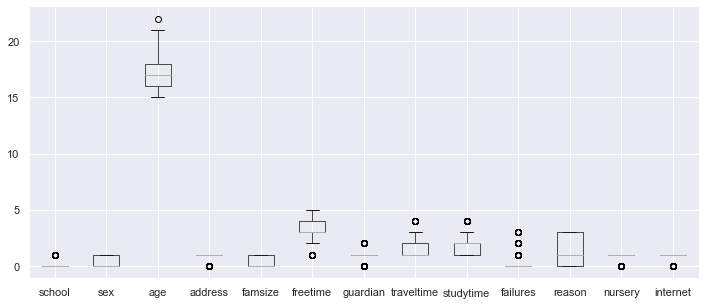

In [15]:
# Check outliers

# Outliers, use box plot to detect outlier.

boxplot=RealStudent_df.boxplot(figsize=(12,5))

In [16]:
# check on outliers on our data set :
Q1 = RealStudent_df.quantile(0.25)
Q3 = RealStudent_df.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
print((RealStudent_df< (Q1 - 1.5 * IQR)) | (RealStudent_df> (Q3 + 1.5 * IQR)))

     school    sex    age  address  famsize  freetime  guardian  traveltime  \
0     False  False  False    False    False     False     False       False   
1     False  False  False    False    False     False      True       False   
2     False  False  False    False    False     False     False       False   
3     False  False  False    False    False     False     False       False   
4     False  False  False    False    False     False      True       False   
..      ...    ...    ...      ...      ...       ...       ...         ...   
390    True  False  False    False    False     False      True       False   
391    True  False  False    False    False     False     False       False   
392    True  False  False     True    False     False      True       False   
393    True  False  False     True    False     False     False       False   
394    True  False  False    False    False     False      True       False   

     studytime  failures  reason  nursery  internet

In [17]:
# Removing the outliers 
for column in RealStudent_df:
    m1=RealStudent_df[column].quantile(0.50)
    p1=RealStudent_df[column].quantile(0.95)
    RealStudent_df[column] = np.where(RealStudent_df[column] > p1, m1, RealStudent_df[column])
RealStudent_df.describe()
RealStudent_df

,school,sex,age,address,famsize,freetime,guardian,traveltime,studytime,failures,reason,nursery,internet
0,0.0,0.0,18.0,1.0,0.0,3.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0
1,0.0,0.0,17.0,1.0,0.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0
2,0.0,0.0,15.0,1.0,1.0,3.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0
3,0.0,0.0,15.0,1.0,0.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0
4,0.0,0.0,16.0,1.0,0.0,3.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,17.0,1.0,1.0,5.0,2.0,1.0,2.0,2.0,0.0,1.0,0.0
391,1.0,1.0,17.0,1.0,1.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0
392,1.0,1.0,17.0,0.0,0.0,5.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
393,1.0,1.0,18.0,0.0,1.0,4.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0


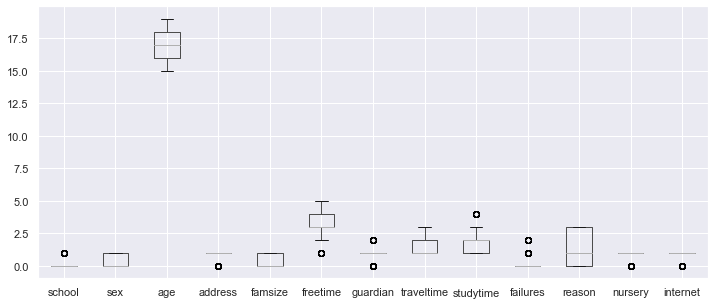

In [18]:
boxplot=RealStudent_df.boxplot(figsize=(12,5))

#### Question 1a

In this take-home exam, you will try and apply everything you have learned this semester to 1 dataset. The dataset you will be working with, is . As very first assignment, you load in the dataset here, and divide it over 2 dataframes: *X_df* and *Y_df*. The former should contain all the independent variables present in the dataset, while the latter contains all the dependent variables. 
Do so here:

In [19]:
# import data and divide over dataframes

# independent variable dataframe 
X_df = RealStudent_df.loc[:,["school",
                         "sex" , 
                         "age",
                         "address",
                         "famsize",
                         "freetime",
                         "guardian",
                         "traveltime",
                         "studytime",
                         "failures",
                         "reason",
                         "nursery",
                         "internet"]]


# dependent variable dataframe

Y_df = Y_df

# G3 This is Y and the data we need to predict.

# explain what you have done and why here:


I divided my dataframe into two sub dataframe: X_df which is our independent dataframe and Y_df which is our dependent dataframe, this would helps us to easy choose which varailble could be us to predict our independent variable which is our G. and I did this here because it an exploration technique so it is important to do it before getting into your analysis and forecast.

In [20]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=1.9,vmax=2.1, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=20)

(array([ 38.,   0.,   8.,  24.,  60., 103.,  62.,  60.,  22.,  17.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

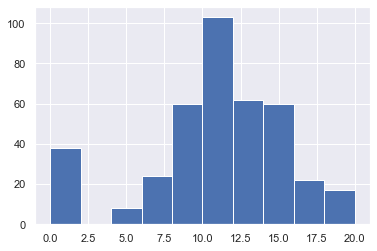

In [21]:
# Histogram to show the variation of our score.
plt.hist(Y_df)

In [22]:
# Here i just inserted our independent variable to our dataframe. 

RealStudent_df.insert(loc=13 , column='G3', value=Y_df)

In [23]:
RealStudent_df

,school,sex,age,address,famsize,freetime,guardian,traveltime,studytime,failures,reason,nursery,internet,G3
0,0.0,0.0,18.0,1.0,0.0,3.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,6
1,0.0,0.0,17.0,1.0,0.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,6
2,0.0,0.0,15.0,1.0,1.0,3.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,10
3,0.0,0.0,15.0,1.0,0.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,15
4,0.0,0.0,16.0,1.0,0.0,3.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,17.0,1.0,1.0,5.0,2.0,1.0,2.0,2.0,0.0,1.0,0.0,9
391,1.0,1.0,17.0,1.0,1.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,16
392,1.0,1.0,17.0,0.0,0.0,5.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,7
393,1.0,1.0,18.0,0.0,1.0,4.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,10


The histogram above just shows how our score was distributed in our dataset, we can see that many student had above 10.0 socore and a vast majority of studetnt at average score and no student had 2.5 score

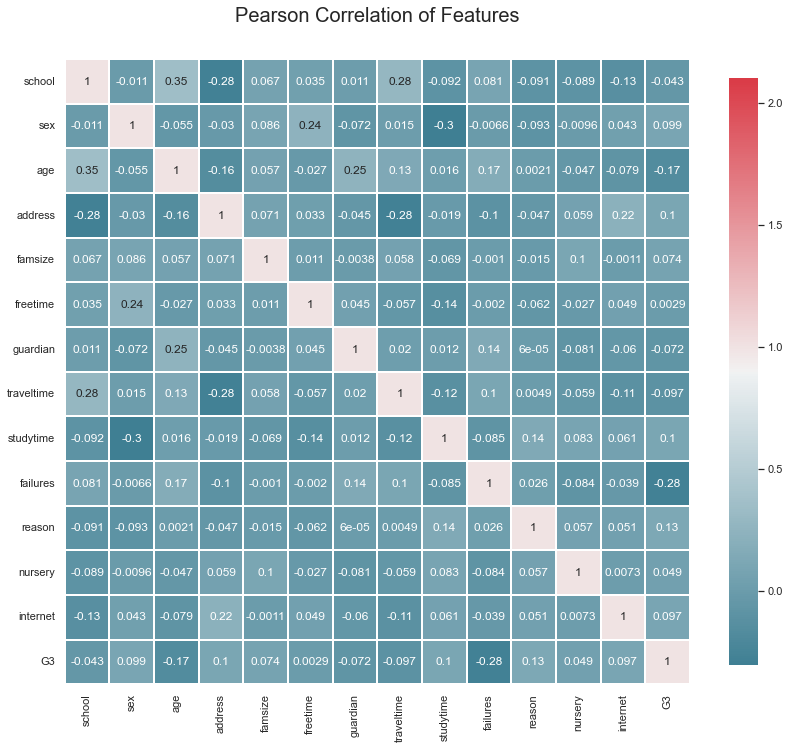

In [24]:
correlation_heatmap(RealStudent_df)

#### Question 1b

**You are not permitted to use all variables in your analysis**.
Using the *Data Assignment* script above, you will receive the variables you are allowed to use.
Before you go any further, you should take a look at the variables that have been assigned to you. For these variables, you will add 1 quadratic term and 1 interaction term.

A Quadratic Term is a transformation of an existing variable. Let's say I have variable $x$ in my dataset, the quadratic term would then be $x^2$. Make the quadratic term that is asked from you by the *Data Assignment* script, and add it to the dataframe containing your independent variables. Note: when you add a quadratic term of a variable which is not yet in your dataframe, you also need to add the underlying variable to your dataframe! Otherwise, your analyses will not make any sense.

An Interaction Term is the multiplication of two existing terms. Let's say I have variables $x$ and $y$ in my dataset, the interaction term would then be $x*y$. Note: the same remark as with the quadratic term holds. The original terms also need to be present in your dataframe. If they are not in there yet, please add them!


Make a new dataframe, called *X_df_complete* in which you select the relevant dependent variables and add the Quadratic and Interaction Term. Do so here:

#### Question 1c

What does the Interaction Term and the Quadratic Term signify? Investigate, illustrate with graphs, and report below:

# Quadratic Term 

In [25]:
X = pow(RealStudent_df["reason"], 2)
Quadratic_DF = pd.DataFrame({'Reason': RealStudent_df["reason"],'G3':RealStudent_df["G3"],'QuadraticTerm': X})
Quadratic_DF

,Reason,G3,QuadraticTerm
0,0.0,6,0.0
1,0.0,6,0.0
2,2.0,10,4.0
3,1.0,15,1.0
4,1.0,10,1.0
...,...,...,...
390,0.0,9,0.0
391,0.0,16,0.0
392,0.0,7,0.0
393,0.0,10,0.0


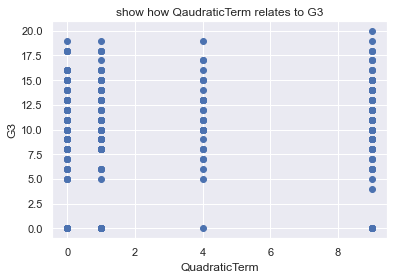

In [26]:
plt.plot(Quadratic_DF['QuadraticTerm'], Quadratic_DF['G3'] , 'o')
plt.xlabel('QuadraticTerm')
plt.ylabel('G3')
plt.title("show how QaudraticTerm relates to G3")

plt.show()

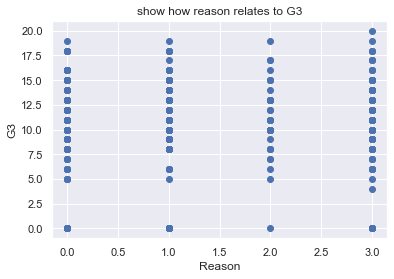

In [27]:
plt.plot(Quadratic_DF['Reason'], Quadratic_DF['G3'] , 'o')
plt.xlabel('Reason')
plt.ylabel('G3')
plt.title("show how reason relates to G3")

plt.show()

# Interaction Term

In [28]:
z = RealStudent_df["reason"]*RealStudent_df["G3"]
Interactive_DF = pd.DataFrame({'Reason': RealStudent_df["reason"],'G3':RealStudent_df["G3"],'InterativeTerm': z})
Interactive_DF

,Reason,G3,InterativeTerm
0,0.0,6,0.0
1,0.0,6,0.0
2,2.0,10,20.0
3,1.0,15,15.0
4,1.0,10,10.0
...,...,...,...
390,0.0,9,0.0
391,0.0,16,0.0
392,0.0,7,0.0
393,0.0,10,0.0


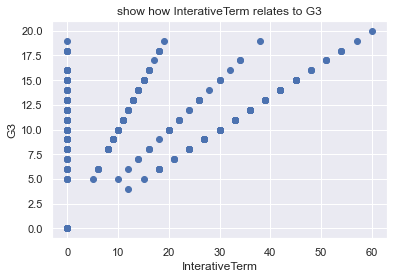

In [29]:
plt.plot(Interactive_DF['InterativeTerm'], Interactive_DF['G3'] , 'o')
plt.xlabel('InterativeTerm')
plt.ylabel('G3');
plt.title("show how InterativeTerm relates to G3")

plt.show()

From the graph here we see that we you perform an interaction between the independent and dependent variable it changes it behaviours we can see that clearly in the graph above.

explanation and interpretation of the interaction term goes here


explanation and interpretation of the quadratic term goes here


In [30]:
RealStudent_df["G3Cat"] = [0]*len(RealStudent_df)
RealStudent_df["G3Cat"] = np.where(RealStudent_df["G3"]<= 5,"very poor",RealStudent_df["G3Cat"])
RealStudent_df["G3Cat"] = np.where((RealStudent_df["G3"]> 5 ) & (RealStudent_df["G3"] < 10),"poor",RealStudent_df["G3Cat"])
RealStudent_df["G3Cat"] = np.where((RealStudent_df["G3"]>= 10 ) & (RealStudent_df["G3"] <= 15),"average",RealStudent_df["G3Cat"])
RealStudent_df["G3Cat"] = np.where(RealStudent_df["G3"]> 15,"Excelent",RealStudent_df["G3Cat"])
RealStudent_df['G3Cat']=RealStudent_df['G3Cat'].astype('category').cat.codes

In [31]:
RealStudent_df

,school,sex,age,address,famsize,freetime,guardian,traveltime,studytime,failures,reason,nursery,internet,G3,G3Cat
0,0.0,0.0,18.0,1.0,0.0,3.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,6,2
1,0.0,0.0,17.0,1.0,0.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,6,2
2,0.0,0.0,15.0,1.0,1.0,3.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,10,1
3,0.0,0.0,15.0,1.0,0.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,15,1
4,0.0,0.0,16.0,1.0,0.0,3.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,17.0,1.0,1.0,5.0,2.0,1.0,2.0,2.0,0.0,1.0,0.0,9,2
391,1.0,1.0,17.0,1.0,1.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,16,0
392,1.0,1.0,17.0,0.0,0.0,5.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,7,2
393,1.0,1.0,18.0,0.0,1.0,4.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,10,1


#### Question 1d

Form your training and test set. Explain why you do this.

In [32]:
## code making the training and test set
##Data partioning
XL = RealStudent_df["reason"][:, np.newaxis]
yL = RealStudent_df["G3"]
##splitting the data in to test and train
X_train, X_test, y_train, y_test = train_test_split(XL, yL, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(315, 1) (79, 1) (315,) (79,)


C:\Users\rrond\AppData\Local\Temp\ipykernel_15396\4235008544.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  XL = RealStudent_df["reason"][:, np.newaxis]


In [33]:
RealStudent_df['G3Cat'].unique()

array([2, 1, 0, 3], dtype=int8)

explanation on training and test set goes here

Above, i partitioned our dataframe into a train and test. It is important to do so im machine learning. Our train set is use to train our model while our test is used to determine the accuracy of our model. This is important to check for **overfitting** (when our model does not represent the point of our data set) and to check for **Underfitting**(here our model fit alot be higher too accurately and whould not be able be to perform well to unforsen data i.e it only performs well on training data but performs poorly on testing data)

# *Intermezzo*

Note the nice formatting we have used in Question 1. It is expected of you to do the same for Questions 2-5. Because I do not know exactly what you will do in each of these questions, I have not provided a blueprint of the solutions formatting.

### Question 2: Regression

You will note that the dependent variable is continuous. Perform a regression analysis. (Also experiment with the interaction & quadratic terms, and report on what happens). Be complete!

# LINEAR REGRESSION 

#### Plot of our independent and dependent variable 

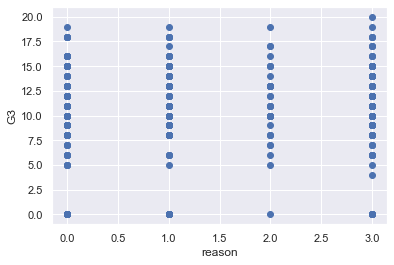

In [34]:
plt.plot(XL, yL , 'o')
plt.xlabel('reason')
plt.ylabel('G3')
plt.show()

In [35]:
Studentdf_LinearR = LinearRegression()
SRL = Studentdf_LinearR.fit( X_train,y_train)

In [36]:
print("Intercept (Beta 0): {}".format(SRL.intercept_))
print("Slope (Beta 1): {}".format(SRL.coef_[0]))

Intercept (Beta 0): 9.74664708224086
Slope (Beta 1): 0.5905390750477025


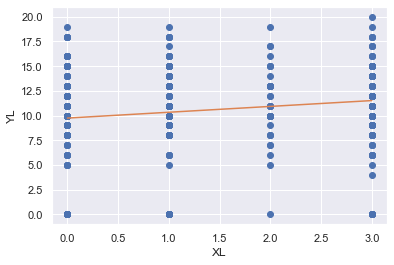

In [37]:
min_pt = XL.min() * SRL.coef_[0] + SRL.intercept_
max_pt = XL.max() * SRL.coef_[0] + SRL.intercept_
plt.plot(XL, yL, 'o')
plt.plot([XL.min(), XL.max()], [min_pt, max_pt])
plt.xlabel("XL")
plt.ylabel("YL")
plt.show()

## Using our Regression model to futher show this 

In [38]:
Studentdf_LinearR = LinearRegression()

In [39]:
SRL = Studentdf_LinearR.fit( X_train,y_train)

####  Showing predictions of our train 

In [40]:
SRL.score(X_train,y_train)
ytrp_predL = SRL.predict(X_train)
ytep_predL = SRL.predict(X_test)
dataL = (ytrp_predL , y_train)
headersL =["ytrp_predL", "y_trainL"]
print(pd.DataFrame(dataL, headersL))

                  0          1          2          3          4          5    \
ytrp_predL  11.518264  10.337186  11.518264  10.337186   9.746647  11.518264   
y_trainL     4.000000   0.000000  13.000000   0.000000  16.000000  15.000000   

                  6          7          8          9    ...        305  \
ytrp_predL  10.337186  10.337186   9.746647  11.518264  ...  11.518264   
y_trainL    19.000000   8.000000  10.000000   9.000000  ...  14.000000   

                  306        307        308        309        310        311  \
ytrp_predL  10.337186   9.746647  10.337186  10.927725  10.337186  11.518264   
y_trainL    15.000000  13.000000  16.000000   8.000000  15.000000  10.000000   

                 312        313        314  
ytrp_predL  9.746647  11.518264  10.337186  
y_trainL    8.000000  20.000000   0.000000  

[2 rows x 315 columns]


####  Showing predictions of our test 

In [41]:
ytep_predL = SRL.predict(X_test)
dataL = (ytep_predL , y_test)
headersL =["ytep_predL", "y_testL"]
print(pd.DataFrame(dataL, headersL))

                   0          1          2          3         4          5   \
ytep_predL  11.518264  11.518264  11.518264  11.518264  9.746647  10.337186   
y_testL      9.000000  12.000000   8.000000  13.000000  8.000000  10.000000   

                   6          7          8          9   ...         69  \
ytep_predL  11.518264   9.746647   9.746647  10.337186  ...   9.746647   
y_testL     14.000000  15.000000  15.000000   0.000000  ...  12.000000   

                  70         71         72         73         74         75  \
ytep_predL  9.746647  10.337186   9.746647  10.927725  10.337186  10.337186   
y_testL     5.000000  11.000000  12.000000   0.000000   8.000000  12.000000   

                   76         77         78  
ytep_predL  11.518264  10.927725  10.337186  
y_testL     10.000000  10.000000  10.000000  

[2 rows x 79 columns]


#### Evaluating on our train 

In [42]:
print('Mean Absolute Error L:', metrics.mean_absolute_error(y_train, ytrp_predL))
print('Mean Square Error L:', metrics.mean_squared_error(y_train, ytrp_predL))
print('Root Mean Square Error L:', np.sqrt(metrics.mean_squared_error(y_train, ytrp_predL)))
print('R-2 L:', metrics.r2_score(y_train, ytrp_predL))

Mean Absolute Error L: 3.4505961069525806
Mean Square Error L: 20.474448970128957
Root Mean Square Error L: 4.5248700500819865
R-2 L: 0.024399319309174272


#### evaluating on our test

In [43]:
print('Mean Absolute Error L:', metrics.mean_absolute_error(y_test, ytep_predL))
print('Mean Square Error L:', metrics.mean_squared_error(y_test, ytep_predL))
print('Root Mean Square Error L:', np.sqrt(metrics.mean_squared_error(y_test, ytep_predL)))
print('R-2: L:', metrics.r2_score(y_test, ytep_predL))

Mean Absolute Error L: 3.2405297873312766
Mean Square Error L: 20.547814849341755
Root Mean Square Error L: 4.532969760470696
R-2: L: -0.03528685758018102


### Experimenting Linear regression with our Interactive and quadratic terms 

#### Interactive term

In [44]:
Interactive_DF

,Reason,G3,InterativeTerm
0,0.0,6,0.0
1,0.0,6,0.0
2,2.0,10,20.0
3,1.0,15,15.0
4,1.0,10,10.0
...,...,...,...
390,0.0,9,0.0
391,0.0,16,0.0
392,0.0,7,0.0
393,0.0,10,0.0


In [45]:
X = Interactive_DF["InterativeTerm"][:, np.newaxis]
y = Interactive_DF["G3"]

C:\Users\rrond\AppData\Local\Temp\ipykernel_15396\3649004905.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = Interactive_DF["InterativeTerm"][:, np.newaxis]


In [46]:
print('The R2 score of the model on the test set is:', Studentdf_LinearR.score(X, y))

The R2 score of the model on the test set is: -4.923464750976381


#### Quadrative term

In [47]:
Quadratic_DF

,Reason,G3,QuadraticTerm
0,0.0,6,0.0
1,0.0,6,0.0
2,2.0,10,4.0
3,1.0,15,1.0
4,1.0,10,1.0
...,...,...,...
390,0.0,9,0.0
391,0.0,16,0.0
392,0.0,7,0.0
393,0.0,10,0.0


In [48]:
X = Quadratic_DF["QuadraticTerm"][:, np.newaxis]
y = Quadratic_DF["G3"]

C:\Users\rrond\AppData\Local\Temp\ipykernel_15396\605496673.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = Quadratic_DF["QuadraticTerm"][:, np.newaxis]


In [49]:
print('The R2 score of the model on the test set is:', Studentdf_LinearR.score(X, y))

The R2 score of the model on the test set is: -0.18352331104162367


#### Concludsion

The R2 score for both the interative and quadtractive terms are extremely low, futher illustration our model, linear regression can not be use to predict our G3

# MULTIVARIATE

#### Data PARTITIONING,SPLITTING data into test and train and building our model for multivariate

In [50]:
X = RealStudent_df.drop(['G3','G3Cat'],axis=1)
y = RealStudent_df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(315, 13) (79, 13) (315,) (79,)


#### SCALING our data set

In [51]:
x = X_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train1 = pd.DataFrame(x_scaled, columns=X_train.columns)

In [52]:
X_train1.corr()

,school,sex,age,address,famsize,freetime,guardian,traveltime,studytime,failures,reason,nursery,internet
school,1.000000,-0.012655,0.318388,-0.286836,0.081952,0.060951,0.033141,0.299960,-0.123601,0.060290,-0.094184,-0.091426,-0.102916
sex,-0.012655,1.000000,-0.052007,-0.021546,0.048257,0.194008,-0.067760,-0.011157,-0.299787,-0.020991,-0.113760,-0.028889,0.053921
age,0.318388,-0.052007,1.000000,-0.158840,0.071025,0.003420,0.274255,0.135447,-0.013397,0.147694,0.003285,-0.022153,-0.067263
address,-0.286836,-0.021546,-0.158840,1.000000,0.088895,0.055903,-0.044531,-0.290408,0.002290,-0.131905,-0.028941,0.058886,0.216663
famsize,0.081952,0.048257,0.071025,0.088895,1.000000,0.023111,-0.001872,0.054174,-0.048844,-0.015669,-0.038110,0.101419,0.010901
freetime,0.060951,0.194008,0.003420,0.055903,0.023111,1.000000,0.027435,-0.077431,-0.140101,-0.051953,-0.090032,-0.001776,0.062697
guardian,0.033141,-0.067760,0.274255,-0.044531,-0.001872,0.027435,1.000000,0.011064,-0.032117,0.122111,-0.027919,-0.071203,-0.052808
traveltime,0.299960,-0.011157,0.135447,-0.290408,0.054174,-0.077431,0.011064,1.000000,-0.135727,0.141672,0.005685,-0.047173,-0.076639
studytime,-0.123601,-0.299787,-0.013397,0.002290,-0.048844,-0.140101,-0.032117,-0.135727,1.000000,-0.096487,0.168724,0.110753,0.047239
failures,0.060290,-0.020991,0.147694,-0.131905,-0.015669,-0.051953,0.122111,0.141672,-0.096487,1.000000,0.039399,-0.061249,0.031067


#### Selection of the best independent values.

In [53]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [54]:
corr_features = correlation(X_train1, 0.7)
len(set(corr_features))

0

In [55]:
## dropping correlated futures out from the test and train
X_trainp=X_train.drop(corr_features,axis=1)
X_testp=X_test.drop(corr_features,axis=1)

#### Defining our model

In [56]:
Studentdf_MultiR = LinearRegression()
SR = Studentdf_MultiR.fit( X_train,y_train)

####  Showing predictions of our train 

In [57]:
SR.score(X_train,y_train)
ytrp_pred=SR.predict(X_train)

ytep_pred=SR.predict(X_test)
data = (ytrp_pred , y_train)

headers=["ytrp_pred", "y_train"]
print(pd.DataFrame(data, headers))

                0          1          2         3          4         5    \
ytrp_pred  6.979761  10.870258  13.407333  9.594802  11.715556  12.29729   
y_train    4.000000   0.000000  13.000000  0.000000  16.000000  15.00000   

                 6          7          8          9    ...        305  \
ytrp_pred  12.821945  11.814343   9.831325  12.595549  ...  11.827848   
y_train    19.000000   8.000000  10.000000   9.000000  ...  14.000000   

                306        307       308       309        310        311  \
ytrp_pred  12.24027   9.560281  10.65479  8.422261  10.828837  11.664448   
y_train    15.00000  13.000000  16.00000  8.000000  15.000000  10.000000   

                312        313        314  
ytrp_pred  7.112366  14.749815  10.291083  
y_train    8.000000  20.000000   0.000000  

[2 rows x 315 columns]


####  Showing predictions of our test 

In [58]:
ytep_pred=SR.predict(X_test)
data = (ytep_pred , y_test)
headers=["ytep_pred", "y_test"]
print(pd.DataFrame(data, headers))

                  0          1         2          3          4         5   \
ytep_pred  12.867515  11.512971  11.79421  11.305971  12.190276  11.80384   
y_test      9.000000  12.000000   8.00000  13.000000   8.000000  10.00000   

                  6          7          8         9   ...         69  \
ytep_pred  11.720182  10.150789  11.705422  7.763809  ...   8.823312   
y_test     14.000000  15.000000  15.000000  0.000000  ...  12.000000   

                 70         71         72        73         74        75  \
ytep_pred  7.845028  11.934701  10.151226  8.644144  11.310826  11.33026   
y_test     5.000000  11.000000  12.000000  0.000000   8.000000  12.00000   

                  76         77         78  
ytep_pred  12.572036  11.180767  10.685757  
y_test     10.000000  10.000000  10.000000  

[2 rows x 79 columns]


#### Evaluating on train

In [59]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, ytrp_pred))
print('Mean Square Error:', metrics.mean_squared_error(y_train, ytrp_pred))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_train, ytrp_pred)))
print('R-2:', metrics.r2_score(y_train, ytrp_pred))

Mean Absolute Error: 3.2224838225054793
Mean Square Error: 17.633805020654794
Root Mean Square Error: 4.19926243769722
R-2: 0.15975505829636205


#### Evaluating on test

In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ytep_pred))
print('Mean Square Error:', metrics.mean_squared_error(y_test, ytep_pred))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, ytep_pred)))
print('R-2:', metrics.r2_score(y_test, ytep_pred))

Mean Absolute Error: 3.269411286478292
Mean Square Error: 18.34430039635648
Root Mean Square Error: 4.283024678466899
R-2: 0.07573563169131037


### Experimenting Linear regression with our Interactive and quadratic terms 

#### Interactive term

In [61]:
Interactive_DF

,Reason,G3,InterativeTerm
0,0.0,6,0.0
1,0.0,6,0.0
2,2.0,10,20.0
3,1.0,15,15.0
4,1.0,10,10.0
...,...,...,...
390,0.0,9,0.0
391,0.0,16,0.0
392,0.0,7,0.0
393,0.0,10,0.0


In [62]:
X = Interactive_DF.drop(['G3'],axis=1)
y = Interactive_DF['G3']

In [63]:
SRI = Studentdf_MultiR.fit( X,y)

In [64]:
print('The R2 score for the interactive data set set is:', math.ceil(SRI.score(X, y)*100),'%')

The R2 score for the interactive data set set is: 48 %


### Quadratic Term

In [65]:
Quadratic_DF

,Reason,G3,QuadraticTerm
0,0.0,6,0.0
1,0.0,6,0.0
2,2.0,10,4.0
3,1.0,15,1.0
4,1.0,10,1.0
...,...,...,...
390,0.0,9,0.0
391,0.0,16,0.0
392,0.0,7,0.0
393,0.0,10,0.0


In [66]:
X = Quadratic_DF.drop(['G3'],axis=1)
y = Quadratic_DF['G3']

In [67]:
SRQ = Studentdf_MultiR.fit( X,y)

In [68]:
print('The R2 score for the Quadratic data set set is:', math.ceil(SRQ.score(X, y)*100),'%')

The R2 score for the Quadratic data set set is: 2 %


### Concludsion

The R2 score for both the interative and quadratic term are below 50%, therefore our model can not be used to predict our independent variable.

### Question 3: Classification

Though we know that the dependent variable is continuous, this does not by any means mean that we can't perform a classification analysis. Encode the dependent variables into several categories you find logical (report which ones and why), and perform a classification analysis on this encoded variable. (Once again, don't be too fast to omit the interaction & quadratic terms). Be complete!

# k Nearest Neighbours

#### CODE making the training and test set

In [69]:
X = RealStudent_df.drop('G3',axis=1).drop('G3Cat',axis=1)
y = RealStudent_df['G3Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='kd_tree', leaf_size=30, 
                         p=2, metric='minkowski',n_jobs=-1)

In [71]:
KN = KNN.fit(X_train,y_train)

In [72]:
score = KN.score(X_test, y_test)
print(score*100,"%")

58.22784810126582 %


In [73]:
yt_pred = KN.predict(X_test)
yt_pred

array([1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1], dtype=int8)

In [74]:
print(classification_report(y_test,yt_pred))
cm = confusion_matrix(y_test,  yt_pred)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, yt_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.63      0.88      0.74        49
           2       0.33      0.13      0.19        15
           3       0.50      0.09      0.15        11

    accuracy                           0.58        79
   macro avg       0.37      0.28      0.27        79
weighted avg       0.53      0.58      0.51        79

Confusion Matrix:
 [[ 0  4  0  0]
 [ 3 43  2  1]
 [ 0 13  2  0]
 [ 0  8  2  1]] 

Accuracy: 0.5822784810126582


In classication the metric we use to evaluate the model are the classification report and the confusion matrix. from the classiciation 
report we obtain the accuracy which is 0.58. this indicate that the model account for 58% in predicting the outcome. 
The confusion
matrix summarises the true positive and true negative of each class in the report.
The confusion matrix gives us a background about of accuracy, here we can see what went right or wrong from the matrix.It has four values; true positive , true negative , false positive and false negative.

The 58% accuracy shows the percentage of the sample that was accurately predicted. The sample or class includes (0,1,2,3). The class 1 had the highest prediction with f1-score of 74% while for class 0 , it had 0 predictions.

### Experimenting KN Neighbor with our interactive and quadratic terms 

#### Interactive Term

In [75]:
Interactive_DF

,Reason,G3,InterativeTerm
0,0.0,6,0.0
1,0.0,6,0.0
2,2.0,10,20.0
3,1.0,15,15.0
4,1.0,10,10.0
...,...,...,...
390,0.0,9,0.0
391,0.0,16,0.0
392,0.0,7,0.0
393,0.0,10,0.0


In [76]:
XI = Interactive_DF.drop('G3',axis=1)
yI = RealStudent_df['G3Cat']

In [77]:
KNI = KNN.fit(XI,yI)

In [78]:
score = KNI.score(XI, yI)
print("Accuracy for interactive term", score*100,"%")

Accuracy for interactive term 68.2741116751269 %


#### Quadractic Term

In [79]:
Quadratic_DF

,Reason,G3,QuadraticTerm
0,0.0,6,0.0
1,0.0,6,0.0
2,2.0,10,4.0
3,1.0,15,1.0
4,1.0,10,1.0
...,...,...,...
390,0.0,9,0.0
391,0.0,16,0.0
392,0.0,7,0.0
393,0.0,10,0.0


In [80]:
XQ = Quadratic_DF.drop('G3',axis=1)
yQ = RealStudent_df['G3Cat']

In [81]:
KNQ = KNN.fit(XQ,yQ)

In [82]:
score = KNQ.score(XQ,yQ)
print("Accuracy of quadratic term:", score*100,"%")

Accuracy of quadratic term: 57.10659898477157 %


#### Concludsion 

# Decision Tree

#### CODE making the training and test set

In [83]:
X = RealStudent_df.drop('G3',axis=1).drop('G3Cat',axis=1)
y = RealStudent_df['G3Cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [84]:
DT=DecisionTreeClassifier().fit(X_train, y_train)

In [85]:
score = DT.score(X_test, y_test)
print(score*100,"%")

49.36708860759494 %


In [86]:
y_pred=DT.predict(X_test)
y_pred

array([1, 0, 2, 0, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 3, 0, 2, 3, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 3, 2, 2, 1, 1, 3, 2, 0,
       3, 1, 2, 1, 0, 1, 3, 1, 0, 1, 1, 2, 1, 2, 3, 2, 1, 1, 0, 1, 0, 3,
       2, 1, 1, 2, 2, 1, 2, 3, 0, 1, 2, 0, 1], dtype=int8)

In [87]:
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,  y_pred)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.25      0.14         4
           1       0.71      0.59      0.64        49
           2       0.29      0.33      0.31        15
           3       0.36      0.36      0.36        11

    accuracy                           0.49        79
   macro avg       0.37      0.38      0.37        79
weighted avg       0.55      0.49      0.52        79

Confusion Matrix:
 [[ 1  2  0  1]
 [ 8 29  7  5]
 [ 1  8  5  1]
 [ 0  2  5  4]] 

Accuracy: 0.4936708860759494


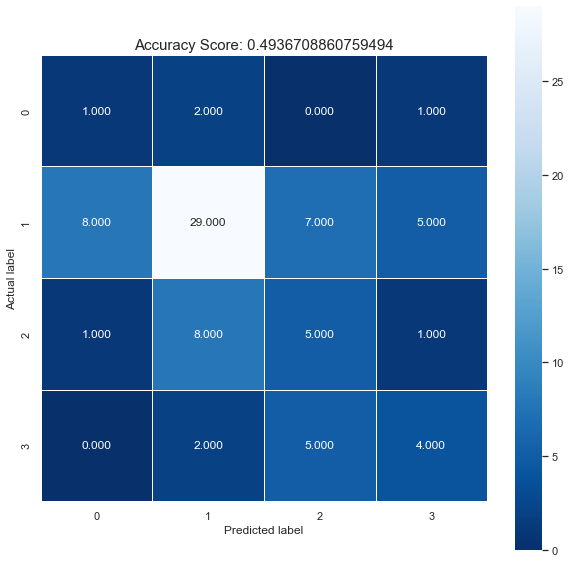

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Experimenting Decision tree with our interactive and quadratic terms 

#### Interactive Term

In [89]:
XI = Interactive_DF.drop('G3',axis=1)
yI = RealStudent_df['G3Cat']

In [90]:
DTI =DecisionTreeClassifier().fit(XI, yI)

In [91]:
score = DTI.score(XI, yI)
print("Acurracy of interative term:", score*100,"%")

Acurracy of interative term: 82.48730964467005 %


#### Quadractic Term

In [92]:
XQ = Quadratic_DF.drop('G3',axis=1)
yQ = RealStudent_df['G3Cat']

In [93]:
DTQ =DecisionTreeClassifier().fit(XQ, yQ)

In [94]:
score = DTQ.score(XQ, yQ)
print("Acurracy of quadratic term:", score*100,"%")

Acurracy of quadratic term: 57.10659898477157 %


#### Concludsion 

### Question 4: Clustering

Now we have analysed the dataset in a supervised manner, let's try and investigate whether this supervised dimension indeed offers additional information. Perform a cluster analysis on the dependent variables, and compare your predictive power with the models you have made in Question 2 and 3. Be complete!

## K-MEANS

In [95]:
X = RealStudent_df.drop('G3',axis=1).drop('G3Cat',axis=1)

In [96]:
data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)

data_scaled.head()

,school,sex,age,address,famsize,freetime,guardian,traveltime,studytime,failures,reason,nursery,internet
0,0.0,0.0,0.970495,0.053916,0.0000,0.161749,0.053916,0.107833,0.107833,0.0,0.000000,0.053916,0.000000
1,0.0,0.0,0.973417,0.057260,0.0000,0.171780,0.000000,0.057260,0.114520,0.0,0.000000,0.000000,0.057260
2,0.0,0.0,0.952501,0.063500,0.0635,0.190500,0.063500,0.063500,0.127000,0.0,0.127000,0.063500,0.063500
3,0.0,0.0,0.960277,0.064018,0.0000,0.128037,0.064018,0.064018,0.192055,0.0,0.064018,0.064018,0.064018
4,0.0,0.0,0.968364,0.060523,0.0000,0.181568,0.000000,0.060523,0.121046,0.0,0.060523,0.060523,0.000000


In [97]:
def K_means(data, center):
    P = KMeans(center)
    labels = P.fit_predict(data)
    return labels

In [98]:
def Do_PCA(Components ,data):
    pca = PCA(Components)
    X_pca = pca.fit_transform(data)
    return pca, X_pca

In [99]:
pca, X_pca = Do_PCA(3 ,X)
X_pca = pd.DataFrame(X_pca, columns=["component1", "component2", "component3"])

C:\Users\rrond\anaconda3\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


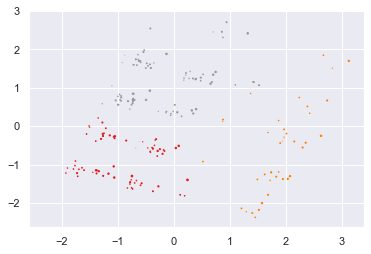

In [100]:
label = K_means(X_pca , 3)
plt.scatter(X_pca["component1"],X_pca["component2"],X_pca["component3"] ,c=label, cmap="Set1")

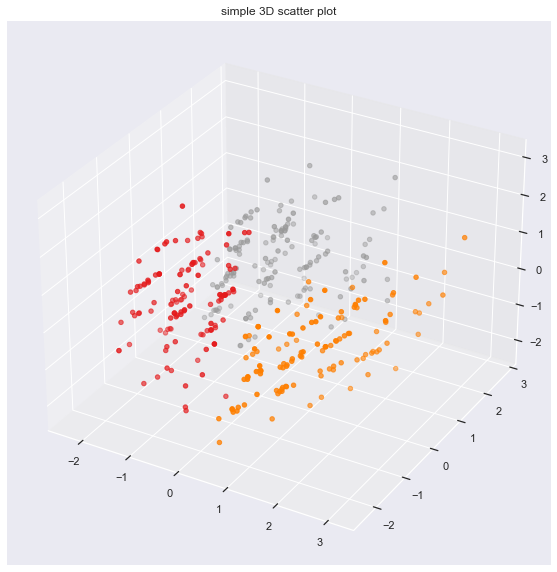

In [101]:
# Creating figure
fig = plt.figure(figsize = (14, 10))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X_pca["component1"],X_pca["component2"],X_pca["component3"] ,c=label, cmap="Set1")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [102]:
pca.explained_variance_ratio_

array([0.23342746, 0.22797481, 0.15735696])

In [103]:
labels = pd.DataFrame(label, columns=["LABEL"])

## Hierarchical clustering

In [104]:
X = RealStudent_df.drop('G3',axis=1).drop('G3Cat',axis=1)

#### Normalization of our data set 

In [105]:
data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)

data_scaled.head()

,school,sex,age,address,famsize,freetime,guardian,traveltime,studytime,failures,reason,nursery,internet
0,0.0,0.0,0.970495,0.053916,0.0000,0.161749,0.053916,0.107833,0.107833,0.0,0.000000,0.053916,0.000000
1,0.0,0.0,0.973417,0.057260,0.0000,0.171780,0.000000,0.057260,0.114520,0.0,0.000000,0.000000,0.057260
2,0.0,0.0,0.952501,0.063500,0.0635,0.190500,0.063500,0.063500,0.127000,0.0,0.127000,0.063500,0.063500
3,0.0,0.0,0.960277,0.064018,0.0000,0.128037,0.064018,0.064018,0.192055,0.0,0.064018,0.064018,0.064018
4,0.0,0.0,0.968364,0.060523,0.0000,0.181568,0.000000,0.060523,0.121046,0.0,0.060523,0.060523,0.000000


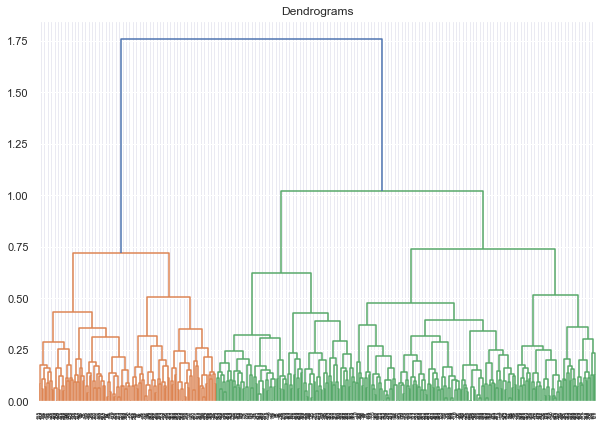

In [106]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

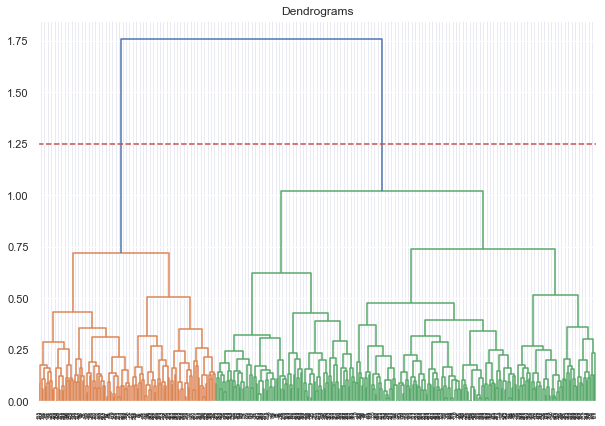

In [107]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.25, color='r', linestyle='--')

##  Let’s now apply hierarchical clustering for 2 clusters as show above

In [108]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [109]:
cluster.fit(data_scaled)
labels = cluster.labels_
labels

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,

### Concludsion

# Question 5: Conclusion

As always: report, conclude, illustrate.

The overall goal of the assignemt was to observe which model could be best use to predict G, which is the grades for the student. The data set that was given to us includes both the assesment of student offering mathematic and portugese. I chosed to work with the mathematic data set becuase it as more complicated to merge the two data set.
We were also given some independent variable which was to be used to predict the Grades of the students (G).
    in mechine learning it is important to clean you data set before comercing with your analysis, So the first step was for me to clean the data and remove any abnormalities.
 
**Reports on Data Cleaning**
- Fortunelately there were no missing values in our dataset, so no much was doing here doing our cleaning process.
- We discovered that the data had one duplicate, so i decided to drop the duplicate.
- Finaly i decided to check on outliers. Uisng boxplot i noticed they were alot of ouliers in our dataset. i replace this ouliers with the means. it is very important to remove outliers because the bring abnormalities to our interpretation.

After cleaning our data, I Analyses our data set using both supervised and unsupervise learning. 

**Reports on supervised learning**
- Linear Regression : In this model we are surpose to check how one of our independent varaible can be use to predict the Grades of the student. Tne independent variable that i used here was "Reason", i choose this because it has the highest correlation with our G as observed in the heat chart. We noticed that from the graph the curse didnt folow the normal linear regression line graph, i also futher check if this model could be possible used to predict G using our linear regression model and calculating the root mean square i.e R^2 Which was about 2.4% and this is very low hence we conclude that our linear regression model wasn't a good model to predict our Grades. 

- Multivariate Model : Since linear regression model was negative, we are going to implement the multivariate model.Here we are goin to use more than one independent variable to predict our Grades. I decided to get the the best variable for the independent variable base on a correlation funciton i made. After fiting our train data set to our model and calculating the R^2 , our root mean square value was about 1.5% which also very low so in concludsion our multivariate model is not good model to predict our Grades G.

- K - Nearest Neighbor : the two above model we predicted a continues values of G, in the next two model we would group/ classify our G and see they can be used possible to predict the grades of our students. Before using our model i had to scaled our data set so all our values are on one scale. This is important so as to get an accurate prediction. after fitting our model we have an acuracy of 58% which is relatively good. The significance of this result indicates that our model could predict correcult 58% of our grades which is good. We also realise that the best class that was predicted was the class of the students belonging to the group 1 class of the grades. in concludsion our the result of our train data set is a good indication that this model is good to predict the grades.

- Decision tree : decision tree is anothe classification technique and follows the same proccedure like our k-nearest neighbor. The accuracy of our decision tree is 45.5% which is low, the significant of this shows that our model only predicts 45% of our entire dataset. Hence this model is not good to predict the grades of the students. 


**Reports on unsupervised learning**

- Clustering: Here we are working only with our independent variables , grouping them into clusters and check their behaviour if a new data set was added in them. I used two aglorithm to do so and they includes the K-means and heirarchycal clustering. For both i was able to group them into 3 clusters.

**NB**: THE BEST MODEL THAT COULD BE USED TO PREDICT THE GRADES WAS THE K-NEAREST NEIGHBOR FOR MY DATA SET. ALSO WE OBSERVE THAT THE PERFORMACE OF OUR INTERATIVE TERM WAS GOOD FOR A MAJORITY OF OUR DATA SET, THIS BECAUSE WHEN WE PERFORM THE INTERATIVE X*Y ON OU DATA SET MADE OUR X CARRY SOME PROPERTIES OF Y .
FOR THE QUADRATIC TERM, IT WAS GOOD FOR MOST OF OUR MODEL. THIS IS BECAUSE DOING X^2 ON MAGNIFIES OUR DATA SET AND HAS NOT EFFECTS ON ITS PROPERTIES.